<h>LIBRARY</h>

In [119]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [120]:
pip install sastrawi

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [121]:
pip install matplotlib 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [122]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [123]:
pip install scikit-learn 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [124]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [125]:
import pandas as pd
import re
import string

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory


<h>DATASET</h>

In [126]:
df = pd.read_csv("ewallet_all_6000.csv")
df

content  score        app  \
0                                                 baik      4      gopay   
1                                      pinjaman mantep      5      gopay   
2                                                bagus      5      gopay   
3                                         bagus banget      5      gopay   
4                                             okey bgt      5      gopay   
...                                                ...    ...        ...   
5995  Alhamdulillah suka di shopee apa apa shopee dong      5  shopeepay   
5996                       sangat memberikan kemudahan      5  shopeepay   
5997                dompet digital aman dan terpercaya      5  shopeepay   
5998                             terima kasih excelent      5  shopeepay   
5999                                          siip tok      5  shopeepay   

                       content_clean  
0                               baik  
1                      pinjam mantep  
2                              bagus  
3                       bagus banget  
4                       bagus banget  
...                              ...  
5995  alhamdulillah suka shope shope  
5996               sangat beri mudah  
5997     dompet digital aman percaya  
5998           terima kasih excelent  
5999                            siip  

[6000 rows x 4 columns]

In [127]:
import re

normalisasi_dict = {
    # Negasi
    "gk": "tidak",
    "ga": "tidak",
    "gak": "tidak",
    "nggak": "tidak",
    "tdk": "tidak",
    "tak": "tidak",

    # Intensitas
    "bgt": "banget",
    "bgtt": "banget",
    "bangett": "banget",

    # Waktu / aspek
    "udh": "sudah",
    "udah": "sudah",
    "sdh": "sudah",
    "blm": "belum",
    "belom": "belum",
    "lg": "lagi",

    # Preposisi & konjungsi
    "dgn": "dengan",
    "dr": "dari",
    "krn": "karena",
    "krna": "karena",
    "tp": "tapi",

    # Verba umum
    "dpt": "dapat",
    "dapet": "dapat",
    "bkin": "bikin",
    "bikin": "buat",
    "karna": "karena",

    # Aplikasi & teknis
    "apk": "aplikasi",
    "apps": "aplikasi",
    "app": "aplikasi",
    "eror": "error",
    "lemottt": "lemot",
    "lemott": "lemot",
    "ngelag": "lag",
    "loading": "load",

    # Penilaian
    "mantappp": "bagus",
    "mantapp": "bagus",
    "mantap": "bagus",
    "mantab": "bagus",
    "bagusss": "bagus",
    "bgus": "bagus",
    "baguss": "bagus",
    "parahhh": "parah",
    "parahh": "parah",
    "jelekknya": "jelek",

    # Kata informal
    "aja": "saja",
    "ajaah": "saja",
    "ajae": "saja",
    "yaa": "ya",
    "yah": "ya",
    "kali": "sering",

    # Nominal & akun
    "duit": "uang",
    "uangnya": "uang",
    "nomernya": "nomor",
    "nomornya": "nomor",

    # Layanan
    "cs": "customer service",

    # Manual
    "dibatalinn": "batal",
    "dibatalin": "batal",
    "batalinn": "batal",
    "batalin": "batal",
    "topup": "isi",
    "ditransferin": "transfer",
    "mesan": "pesan",
    "mesen": "pesan",
    "nyari": "cari",
    "nanya": "tanya",
    "ngebug": "bug",
    "nomer": "nomor",
    "menggunakan": "guna",
    "nunggu": "tunggu",
    "langsung": "cepat",
    "sampe": "sampai,",
    "pake": "pakai",
    "bermanfat": "guna",
    "nungu": "tunggu",
    "tulis rekening": "tulis rekening",
    "muas": "puas",
    "mantap": "bagus",
    "dicancel": "batal",
    "masukin": "masuk",
    "suksesmasukan": "sukses masuk",
    "stabilterkadang": "stabil terkadang",
    "gede": "besar",
    "loadingnya": "load",
    "menunyatapi": "menu tetapi",
    "terjangkauprogram": "jangkau program",
    "berputarputar": "putar",
    "nyaman": "aman",
    "tolol": "buruk",
    "ngirim": "kirim",
    "ilang": "hilang",
    "leletenak": "lelet enak",
    "mntap" : "bagus",
    "ntab" : "bagus",
    "ngeklaim" : "klaim",
    "nyoba" : "coba",
    "mantul" : "bagus",
    "everything" : "semua",
    "okey" : "bagus",
    "kereeeen" : "bagus",
    "kren" : "keren",
    "intiny" : "inti",
    "gajelas" : "tidak jelas",
    "ngga" : "tidak",
    "mantaf" : "bagus",
    "bpkb" : "buku pemilik kendaraan bermotor",
    "abis" : "habis",
    "nomerpin" : "nomor pinjam",
    "lunasin" : "lunas",
    "emang" : "memang",
    "ditolakdan" : "ditolak dan",
    "ribet" : "rumit",
    "muaaantaaap" : "bagus",
    "mudahaman" : "mudah aman",
    "naikjdi" : "naik jadi",
    "msuk" : "masuk",
    "mumudah" : "mudah",
    "lainyg" : "lain",
    "ngak" : "tidak",
    "nganti" : "ganti",
    "nnti" : "nanti",
    "ksih" : "kasih",
    "hilanhpadahal" : "hilang padahal",
    "alhasil" : "hasil",
    "promonya" : "promo",
    "lagipadahal" : "lagi padahal",
    "adminya" : "admin",
    "premiumsaya" : "premium saya",
    "mataapa" : "mata",
    "skrng" : "sekarang",
    "pakek" : "pakai",
    "nyesel" : "sesal",
    "jdinya" : "jadi",
    "bangke" : "buruk",
    "istal" : "instal",
    "memuaskan" : "puas",
    "kembalikanini" : "kembali",
    "prnh" : "pernah",
    "adi" : "jadi",
    "kemaren" : "kemarin",
    "ngajuin" : "ajukan",
    "nyampaipadahal" : "sampai padahal",
    "nyimpen" : "simpan",
    "nyambung" : "sambung",
    "pemberitahuan" : "berita",
    "bnyak" : "banyak",
    "vourchernyaterbaik" : "voucher baik",
    "terkadang" : "kadang",
    "tolaksistemnya" : "tolak sistem",
    "anahjd" : "aneh",
    "hrusnya" : "harus",
    "ajalimit" : "limit",
    "moga" : "semoga",
    "semoga" : "semoga",
    "nipu" : "tipu",
    "upgradegimana" : "upgrade gimana",
    "gunakanmemang" : "guna memang",
    "apain" : "apa",
    "mengecewakanbantuan" : "kecewa bantu",
    "fiturnya" : "fitur",
    "ana" : "ada",
    "membekupadahal" : "beku padahal",
    "jelasmaen" : "jelas main",
    "wktu" : "waktu",
    "xjam" : "jam",
    "gmna" : "gimana",
    "nonaktif" : "non aktif",
    "aftip" : "aktif",
    "hadeh" : "buruk",
    "bloked" : "blokir",
    "aplikasine" : "aplikasi",
    "apik" : "bagus",
    "banking" : "bank",
    "kepotg" : "potong",
    "timaksih" : "terima kasih",
    "berkalikaki" : "kali",
    "bacakenapa" : "baca kenapa",
    "lahkalau" : "kalau",
    "bagusbuat" : "bagus buat",
    "vermuk" : "buruk",
    "anytime" : "waktu",
    "anywhere" : "di mana",
    "gaada" : "tidak ada",
    "baguskeren" : "bagus keren",
    "danaknp" : "dana kenapa",
    "terupdate" : "terus update",
    "mksdnya" : "maksud",
    "walet" : "wallet",
    "banyakin" : "banyak",
    "ychat" : "chat",
    "ypadahal" : "padahal",
    "kereeen" : "keren",
    "eemoga": "semoga",
    "gin": "login",
    "apknya": "aplikasi",
    "apkh": "aplikasi",
    "usahain": "usaha",
    "uangny": "uang",
    "mana": "gimana",
    "aplikasisukses": "aplikasi sukses",

}


def normalisasi(text):
    words = text.split()
    normalized_words = []

    for word in words:
        word = re.sub(r'(.)\1+$', r'\1', word)
        normalized_words.append(normalisasi_dict.get(word, word))

    return " ".join(normalized_words)

In [128]:
# Stopword bawaan Sastrawi
stopword_factory = StopWordRemoverFactory()
stopwords = set(stopword_factory.get_stop_words())

# =========================
# CUSTOM STOPWORD (KHAS DATA E-WALLET)
# =========================
custom_stopwords = {
    # filler / percakapan
    "aja", "nih", "dong", "loh", "kok", "yah", "ya", "nya",
    "deh", "lah", "sih", "tuh", "eh", "beberapa", "karena",
    "padahal", "lalu", "tetep", "gara", "dulu", "siapa", "dan",
    "gimana", "apa", "kenapa", "mengapa", "trus", "gabisa", "dimana",
    "bagaimana", "kok", "sana", "sini", "lho", "loh","yang",
    "iya", "juga", "saja", "sih", "nih", "kok", "kan", "deh",

    # kata aplikasi
    "dana", "gopay", "shopeepay", "shopepay", "shoppepay", "aplikasi",
}

# Gabungkan stopword bawaan + custom
stopwords = stopwords.union(custom_stopwords)

# Stemmer
stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()


In [129]:
def preprocess_text(text):
    # Case folding
    text = text.lower()

    # Hapus non-ASCII
    text = text.encode('ascii', 'ignore').decode()

    # Hapus angka
    text = re.sub(r'\d+', '', text)

    # Hapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Normalisasi kata gaul & typo
    text = normalisasi(text)

    # Tokenisasi
    words = text.split()

    # Hapus kata <= 3 huruf
    words = [word for word in words if len(word) > 3]

    # Stopword removal
    words = [word for word in words if word not in stopwords]

    # Stemming
    words = [stemmer.stem(word) for word in words]

    return " ".join(words)

In [130]:
df['content_clean'] = df['content'].astype(str).apply(preprocess_text)

In [131]:
df[['content', 'content_clean']].head(10)

content            content_clean
0                                       baik                     baik
1                            pinjaman mantep            pinjam mantep
2                                      bagus                    bagus
3                               bagus banget             bagus banget
4                                   okey bgt             bagus banget
5                      cool....abiz...mantap           coolabizmantap
6                                         ok                         
7  bagus tapi aku jarang punya uang di gopay  bagus jarang punya uang
8                             Aplikasi Top,,                         
9                                         ok

In [132]:
df.to_csv("ewallet_all_6000.csv", index=False, encoding='utf-8-sig')

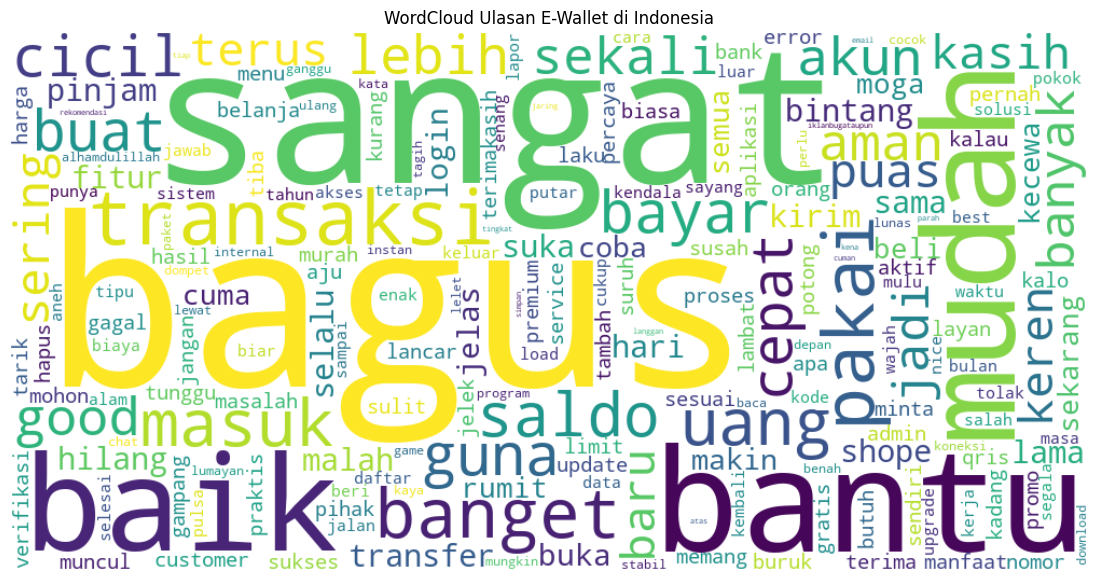

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# WordCloud Semua Aplikasi
text_all = " ".join(df['content_clean'].dropna())

wordcloud_all = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    collocations=False
).generate(text_all)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud Ulasan E-Wallet di Indonesia")
plt.show()

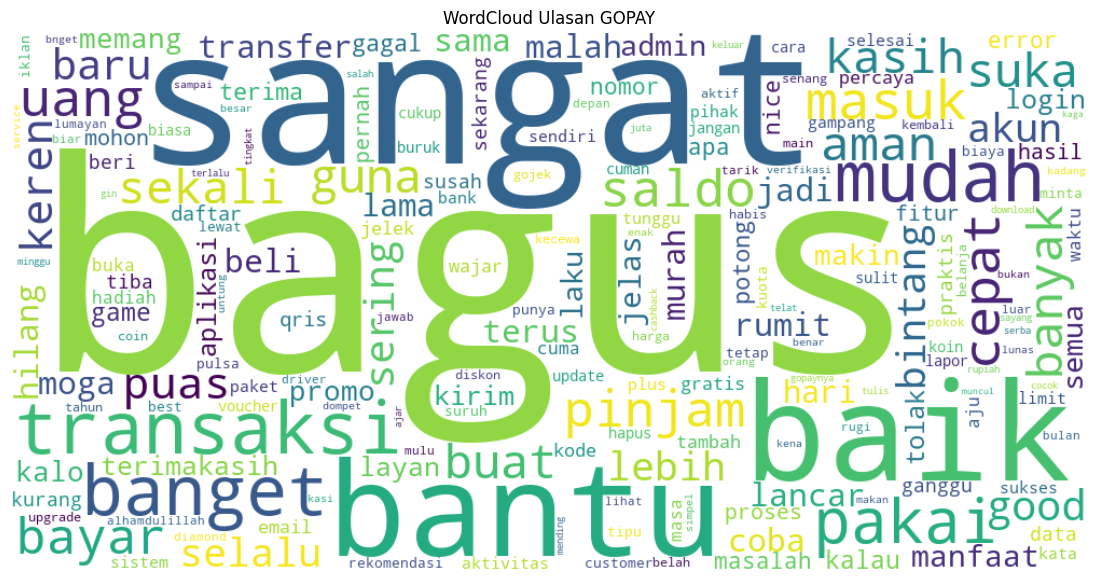

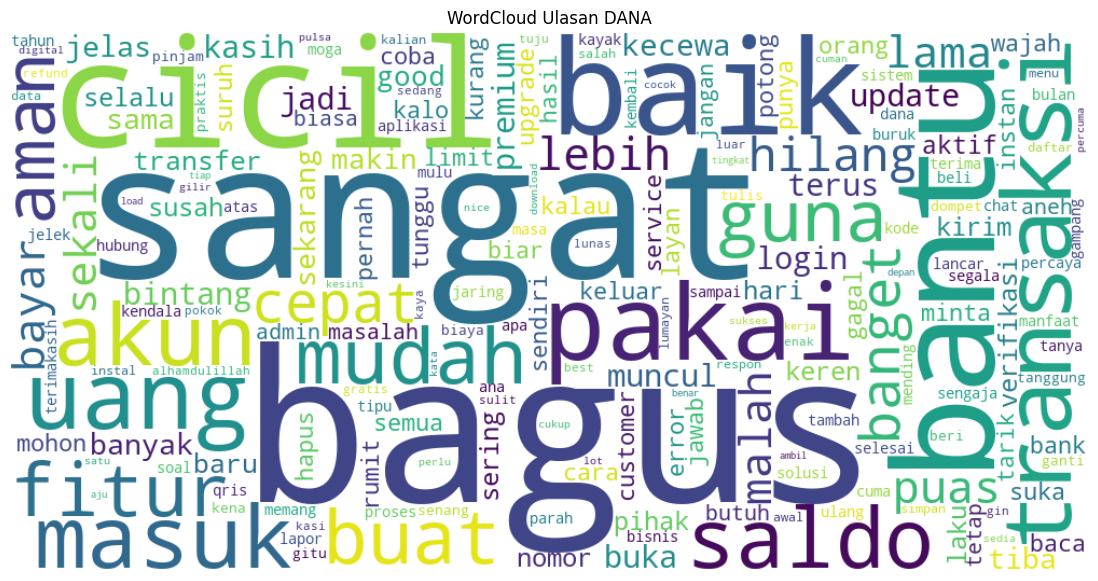

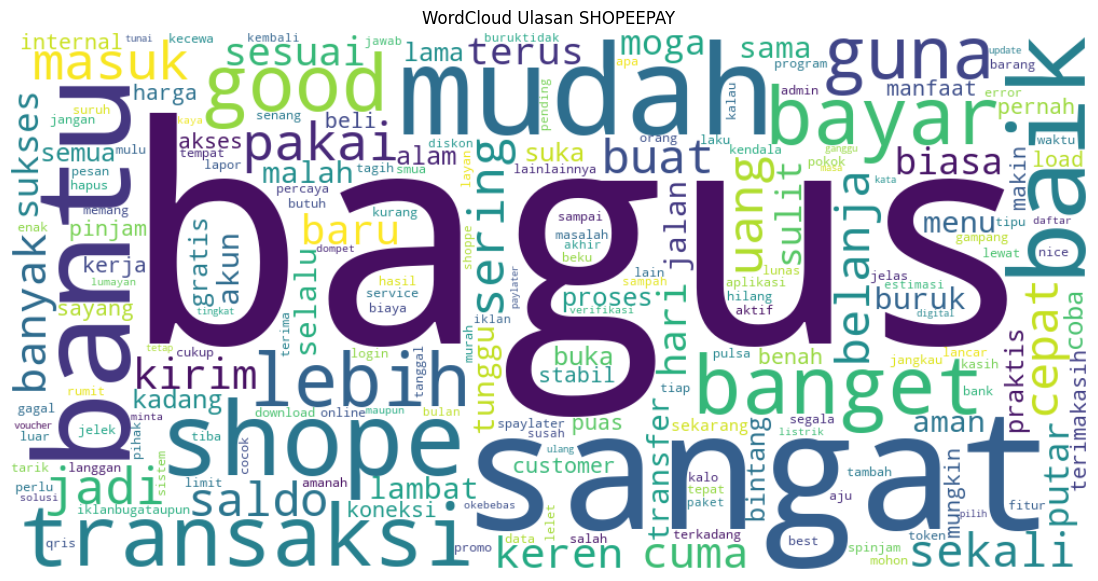

In [134]:
# WordCloud Per Aplikasi
apps = ['gopay', 'dana', 'shopeepay']

for app in apps:
    text_app = " ".join(df[df['app'] == app]['content_clean'].dropna())

    wordcloud = WordCloud(
        width=1000,
        height=500,
        background_color='white',
        collocations=False
    ).generate(text_app)

    plt.figure(figsize=(15,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud Ulasan {app.upper()}")
    plt.show()


LABEL

In [135]:
def label_from_rating(score):
    if score in [1, 2]:
        return "negatif"
    elif score == 3:
        return "netral"
    else:  # 4 dan 5
        return "positif"

df["label_rating"] = df["score"].apply(label_from_rating)
df

content  score        app  \
0                                                 baik      4      gopay   
1                                      pinjaman mantep      5      gopay   
2                                                bagus      5      gopay   
3                                         bagus banget      5      gopay   
4                                             okey bgt      5      gopay   
...                                                ...    ...        ...   
5995  Alhamdulillah suka di shopee apa apa shopee dong      5  shopeepay   
5996                       sangat memberikan kemudahan      5  shopeepay   
5997                dompet digital aman dan terpercaya      5  shopeepay   
5998                             terima kasih excelent      5  shopeepay   
5999                                          siip tok      5  shopeepay   

                       content_clean label_rating  
0                               baik      positif  
1                      pinjam mantep      positif  
2                              bagus      positif  
3                       bagus banget      positif  
4                       bagus banget      positif  
...                              ...          ...  
5995  alhamdulillah suka shope shope      positif  
5996               sangat beri mudah      positif  
5997     dompet digital aman percaya      positif  
5998           terima kasih excelent      positif  
5999                            siip      positif  

[6000 rows x 5 columns]

In [136]:
import json
with open("inset_lexicon.json", "r", encoding="utf-8") as f:
    inset_lex = json.load(f)

pos_dict = inset_lex.get("positive", {})
neg_dict = inset_lex.get("negative", {})

In [137]:
negasi = {"tidak", "bukan", "jangan", "tak", "ga", "gak"}

def label_with_inset(text):
    score = 0.0
    words = text.split()

    for i, w in enumerate(words):
        if w in pos_dict:
            if i > 0 and words[i-1] in negasi:
                score -= pos_dict[w]
            else:
                score += pos_dict[w]

        elif w in neg_dict:
            if i > 0 and words[i-1] in negasi:
                score -= neg_dict[w]
            else:
                score += neg_dict[w]

    if score > 0:
        return "positif"
    elif score < 0:
        return "negatif"
    else:
        return "netral"


In [138]:
# label lexicon
df["label_lexicon"] = df["content_clean"].apply(label_with_inset)

# validasi
df["validasi"] = df["label_rating"] == df["label_lexicon"]

In [139]:
df["validasi"].value_counts()

validasi
True     4164
False    1836
Name: count, dtype: int64

In [140]:
df_noisy = df[df["validasi"] == False]

In [141]:
# ===============================
# DATA TIDAK VALID (Rating ≠ Lexicon)
# ===============================

# Ambil data tidak valid
df_invalid = df[df["label_rating"] != df["label_lexicon"]].copy()

# Jumlah data
print("Jumlah data keseluruhan :", len(df))
print("Jumlah data tidak valid :", len(df_invalid))

# Tampilkan contoh data tidak valid
df_invalid_sample = df_invalid[
    ["app", "content_clean", "label_rating", "label_lexicon"]
].head(5)

print("\nContoh data tidak valid:")
print(df_invalid_sample)

# (OpsIONAL) Simpan ke file
df_invalid.to_csv(
    "data_tidak_valid.csv",
    index=False,
    encoding="utf-8-sig"
)


Jumlah data keseluruhan : 6000
Jumlah data tidak valid : 1836

Contoh data tidak valid:
     app   content_clean label_rating label_lexicon
1  gopay   pinjam mantep      positif        netral
5  gopay  coolabizmantap      positif        netral
6  gopay                      positif        netral
8  gopay                      positif        netral
9  gopay                      positif        netral


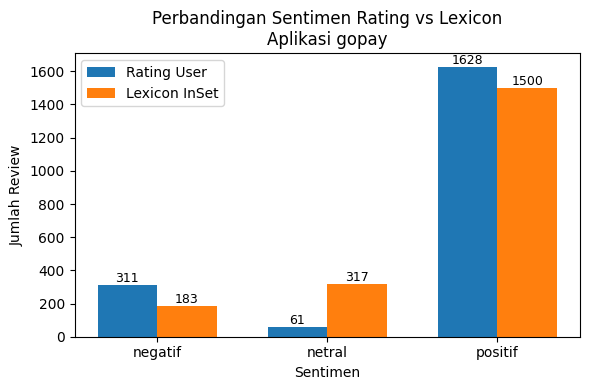

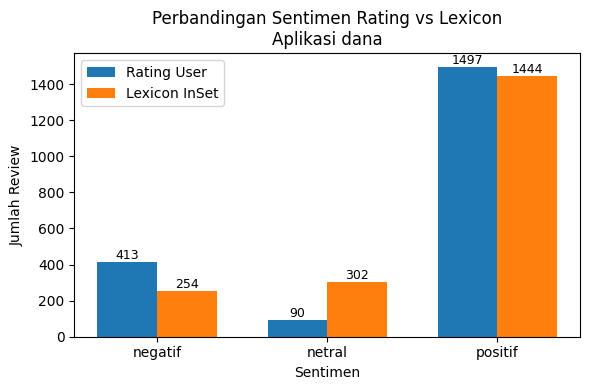

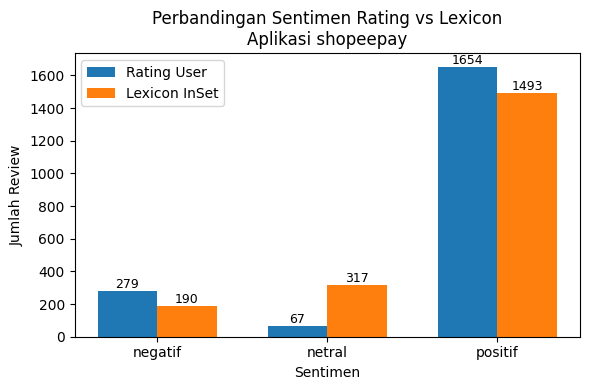

In [142]:
import matplotlib.pyplot as plt
import numpy as np

# Daftar aplikasi
apps = df["app"].unique()

# Fungsi untuk menambahkan angka di atas bar
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2,
            height,
            f"{int(height)}",
            ha="center",
            va="bottom",
            fontsize=9
        )

# Loop per aplikasi
for app in apps:
    df_app = df[df["app"] == app]

    # Hitung distribusi sentimen
    rating_counts = df_app["label_rating"].value_counts()
    lexicon_counts = df_app["label_lexicon"].value_counts()

    sentiments = ["negatif", "netral", "positif"]
    rating_vals = [rating_counts.get(s, 0) for s in sentiments]
    lexicon_vals = [lexicon_counts.get(s, 0) for s in sentiments]

    x = np.arange(len(sentiments))
    width = 0.35

    plt.figure(figsize=(6,4))

    bars1 = plt.bar(x - width/2, rating_vals, width, label="Rating User")
    bars2 = plt.bar(x + width/2, lexicon_vals, width, label="Lexicon InSet")

    # Tambahkan angka di atas bar
    add_value_labels(bars1)
    add_value_labels(bars2)

    plt.xticks(x, sentiments)
    plt.xlabel("Sentimen")
    plt.ylabel("Jumlah Review")
    plt.title(f"Perbandingan Sentimen Rating vs Lexicon\nAplikasi {app}")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [143]:
# Ambil data yang VALID (rating == lexicon)
df_valid = df[df["label_rating"] == df["label_lexicon"]].copy()

print("Jumlah data awal :", len(df))
print("Jumlah data valid:", len(df_valid))


Jumlah data awal : 6000
Jumlah data valid: 4164


In [144]:
pivot = (
    df_valid
    .groupby(["app", "label_rating"])
    .size()
    .unstack(fill_value=0)
)

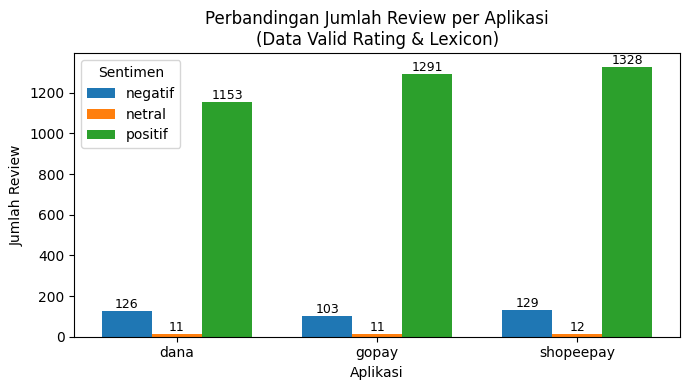

In [145]:
import numpy as np
import matplotlib.pyplot as plt

apps = pivot.index.tolist()
sentiments = pivot.columns.tolist()

x = np.arange(len(apps))
width = 0.25

plt.figure(figsize=(7,4))

for i, sent in enumerate(sentiments):
    bars = plt.bar(
        x + i * width,
        pivot[sent],
        width,
        label=sent
    )

    # Tambahkan angka di atas bar
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{int(height)}",
            ha="center",
            va="bottom",
            fontsize=9
        )

plt.xticks(x + width, apps)
plt.xlabel("Aplikasi")
plt.ylabel("Jumlah Review")
plt.title("Perbandingan Jumlah Review per Aplikasi\n(Data Valid Rating & Lexicon)")
plt.legend(title="Sentimen")
plt.tight_layout()
plt.show()


WORLDCLOUD

In [146]:
from wordcloud import WordCloud
def plot_wordcloud(text, title):
    wc = WordCloud(
        width=800,
        height=400,
        background_color="white",
        max_words=200,
        collocations=False
    ).generate(text)

    plt.figure(figsize=(8,4))
    plt.imshow(wc)
    plt.axis("off")
    plt.title(title)
    plt.show()


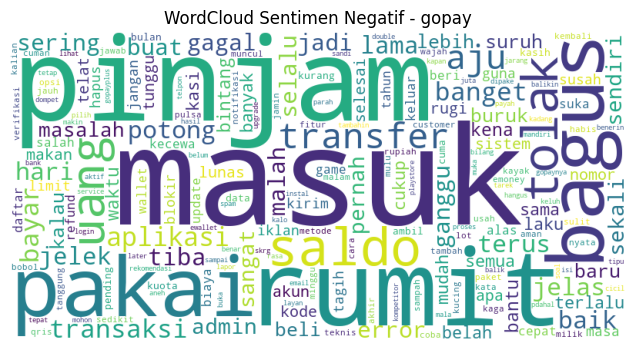

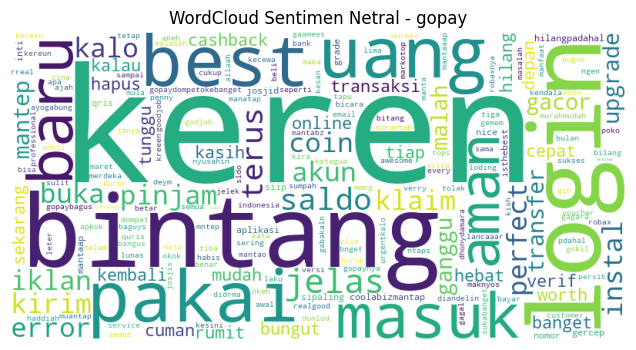

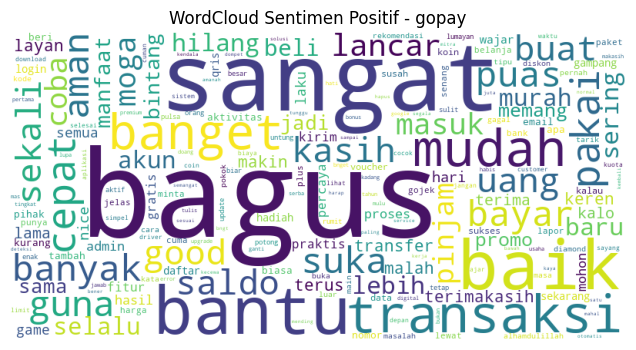

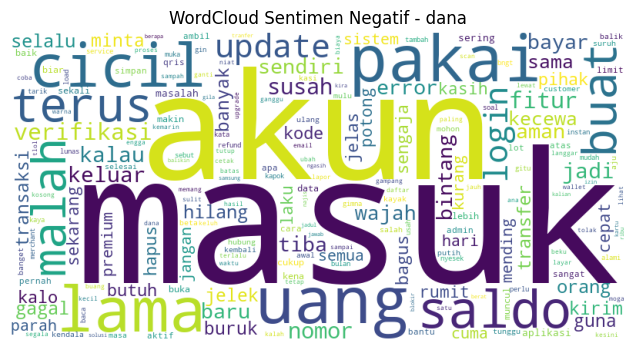

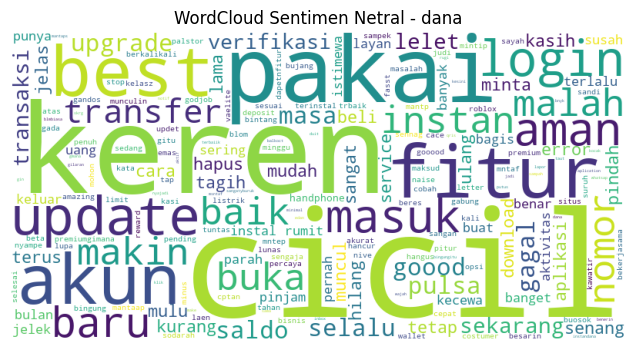

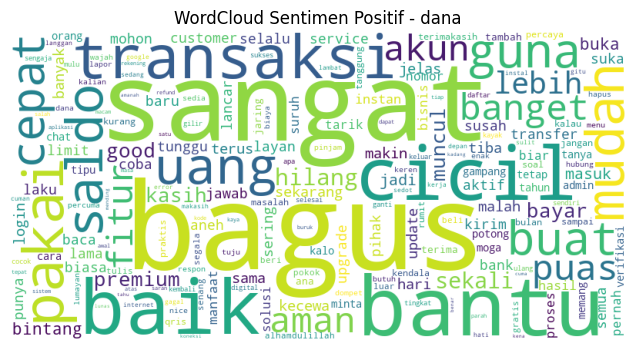

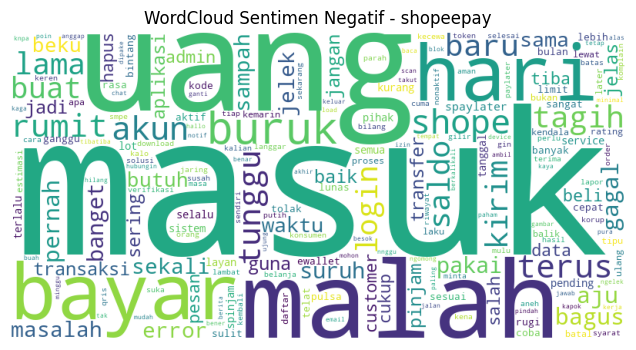

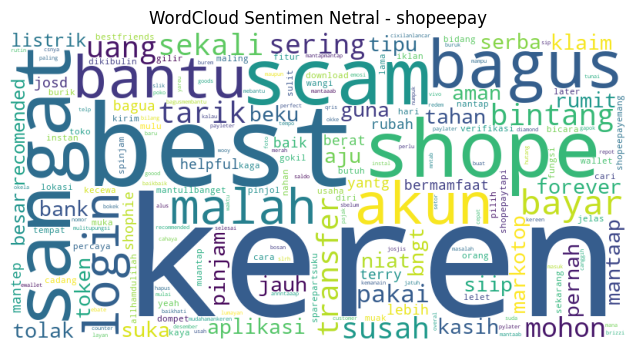

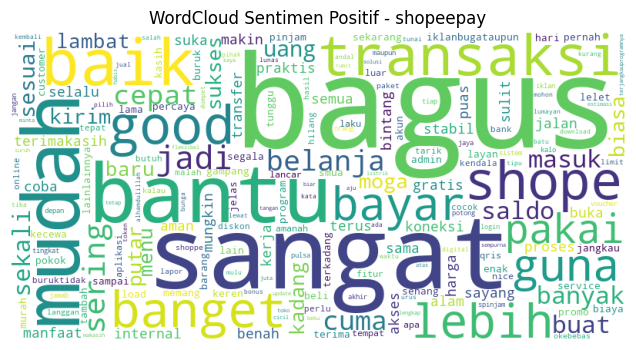

In [147]:
apps = df["app"].unique()
sentiments = ["negatif", "netral", "positif"]

for app in apps:
    for sent in sentiments:
        subset = df[
            (df["app"] == app) &
            (df["label_lexicon"] == sent)
        ]

        if subset.empty:
            continue

        text = " ".join(subset["content_clean"].dropna())

        plot_wordcloud(
            text,
            f"WordCloud Sentimen {sent.capitalize()} - {app}"
        )


N-GRAM

In [148]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [149]:
def plot_ngram_bar(texts, ngram_range, title, top_n=10):
    vectorizer = CountVectorizer(
        ngram_range=ngram_range,
        max_features=top_n
    )
    
    X = vectorizer.fit_transform(texts)
    freq = X.toarray().sum(axis=0)
    
    vocab = vectorizer.get_feature_names_out()
    df_freq = pd.DataFrame({
        "ngram": vocab,
        "freq": freq
    }).sort_values("freq", ascending=False)

    plt.figure(figsize=(7,4))
    plt.barh(df_freq["ngram"], df_freq["freq"])
    plt.gca().invert_yaxis()
    plt.xlabel("Frekuensi")
    plt.title(title)

    # Tambahkan angka di ujung bar
    for i, v in enumerate(df_freq["freq"]):
        plt.text(v, i, str(int(v)), va="center")

    plt.tight_layout()
    plt.show()


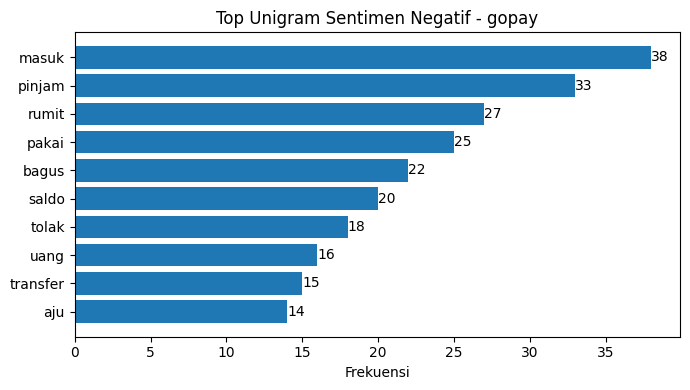

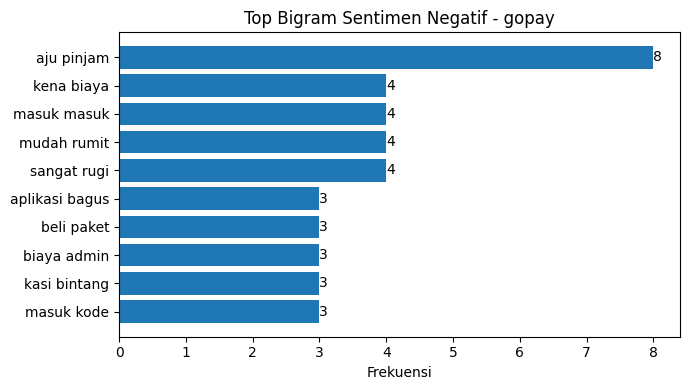

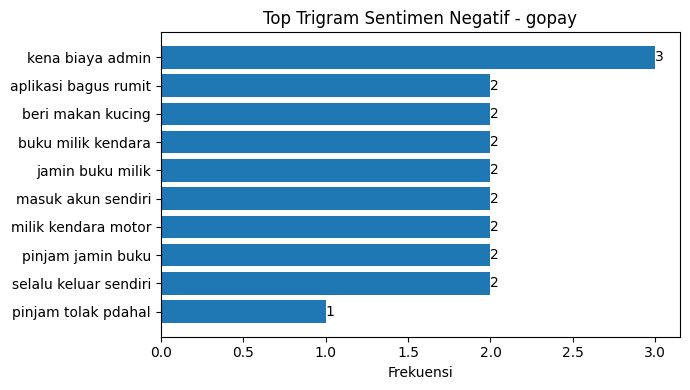

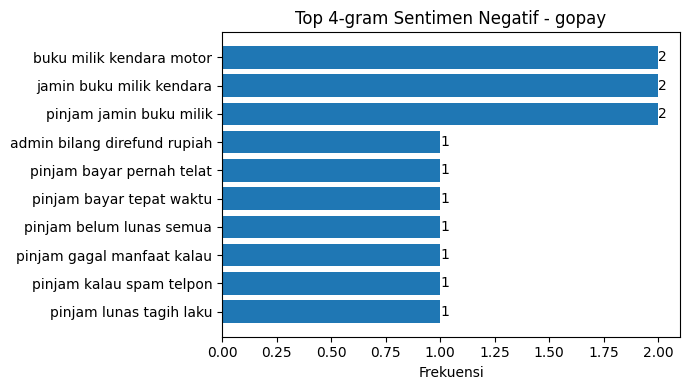

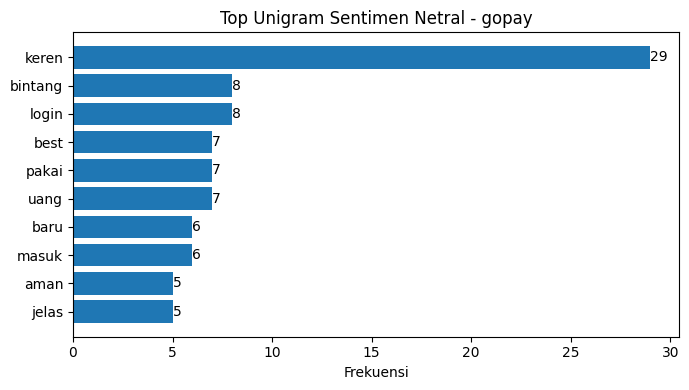

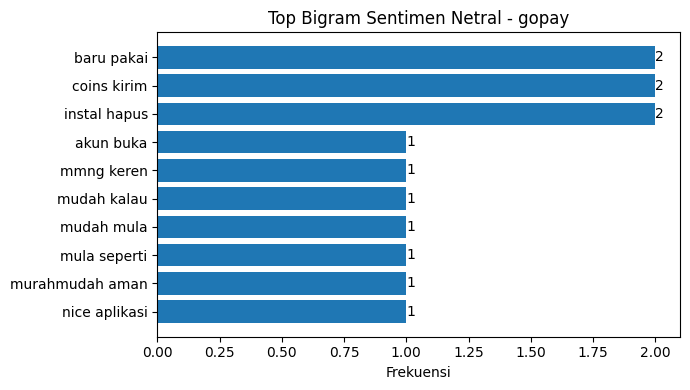

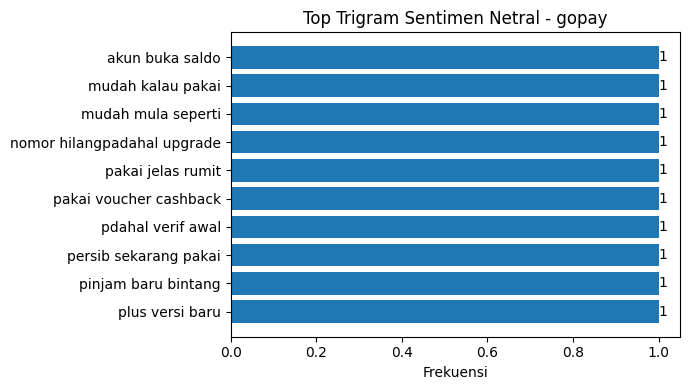

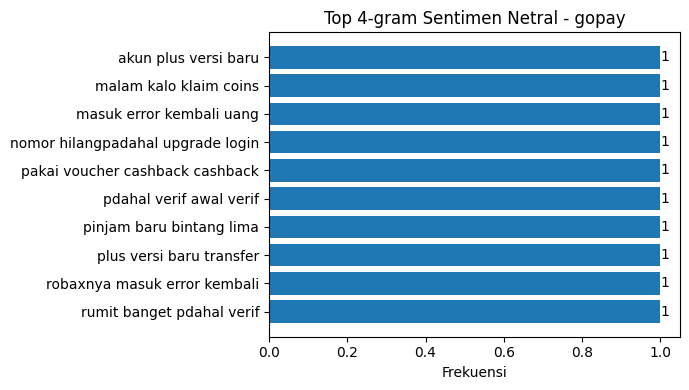

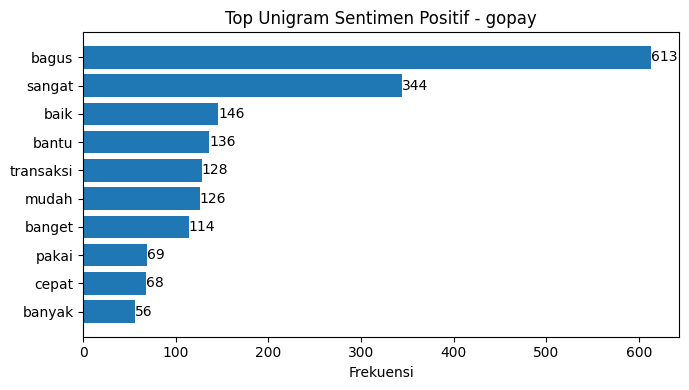

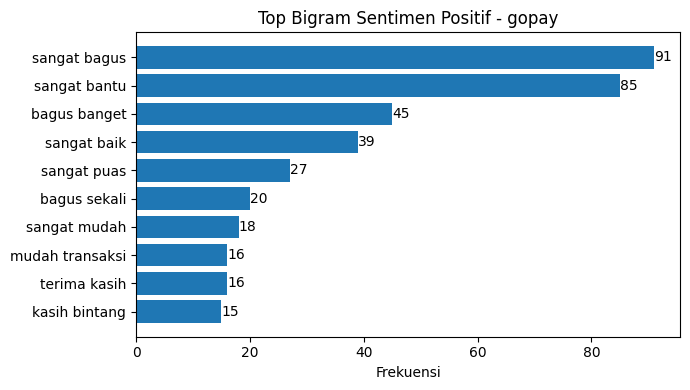

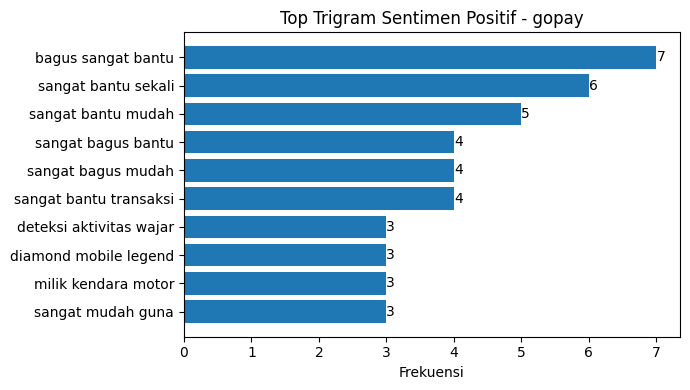

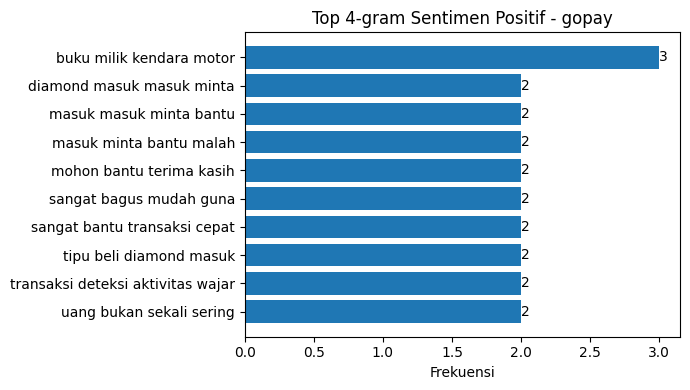

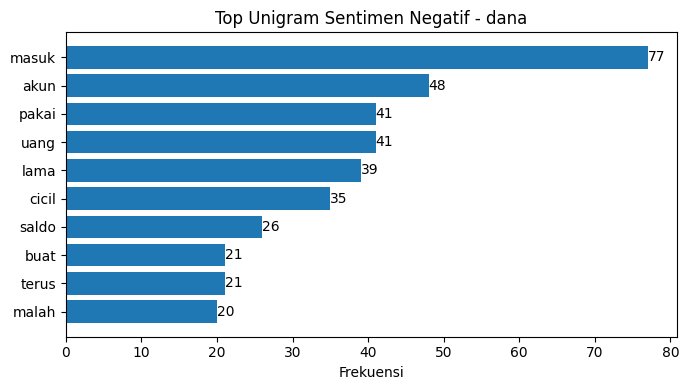

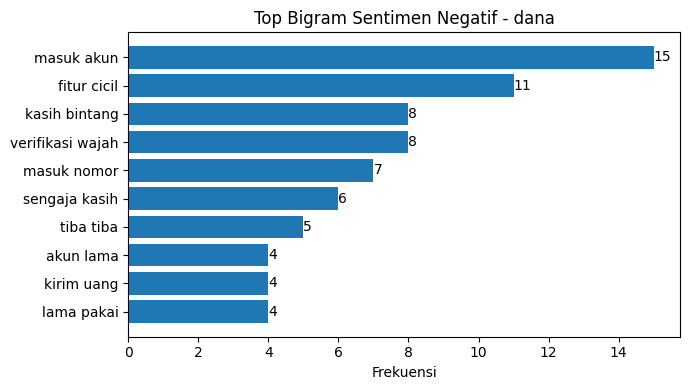

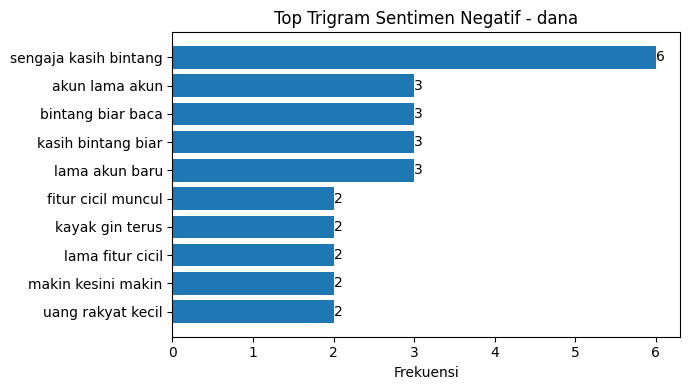

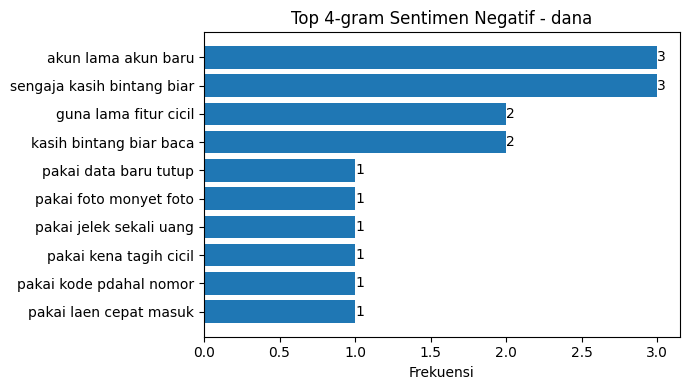

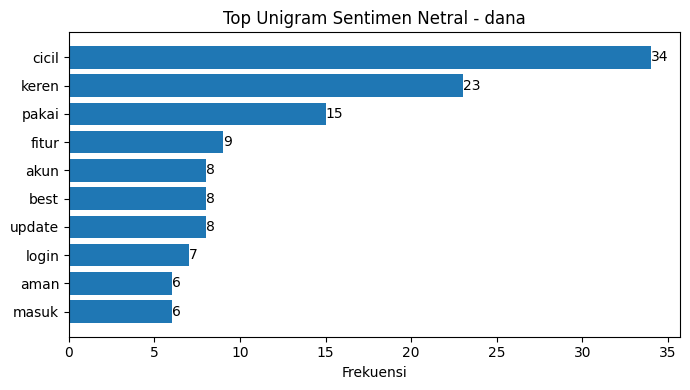

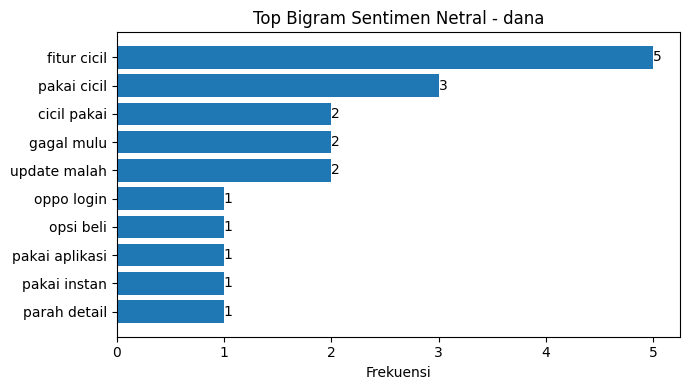

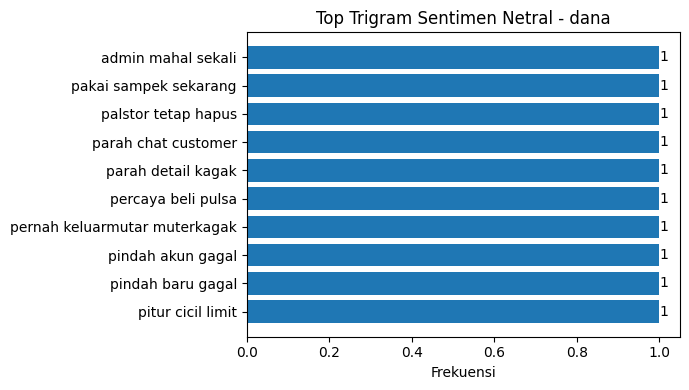

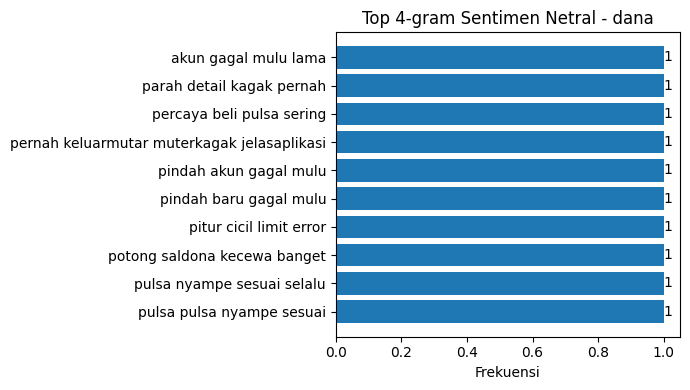

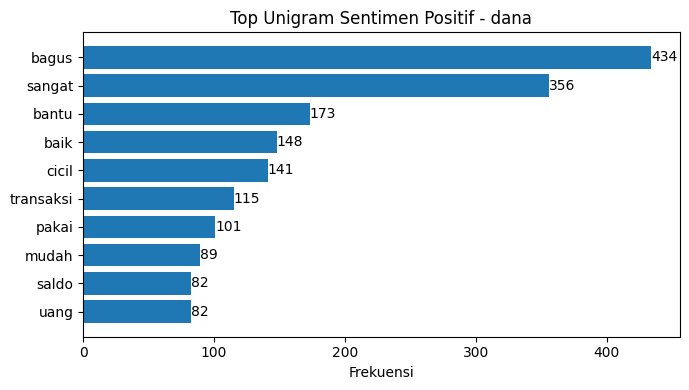

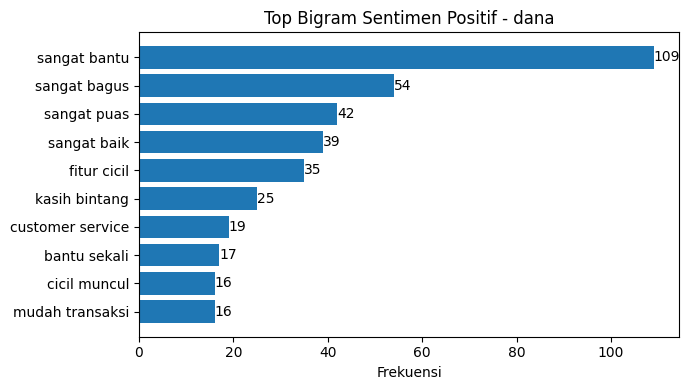

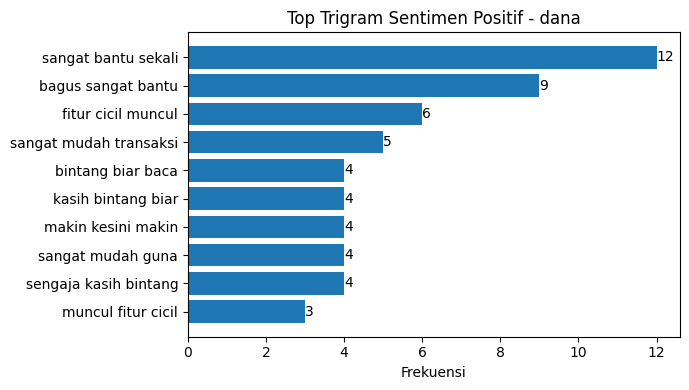

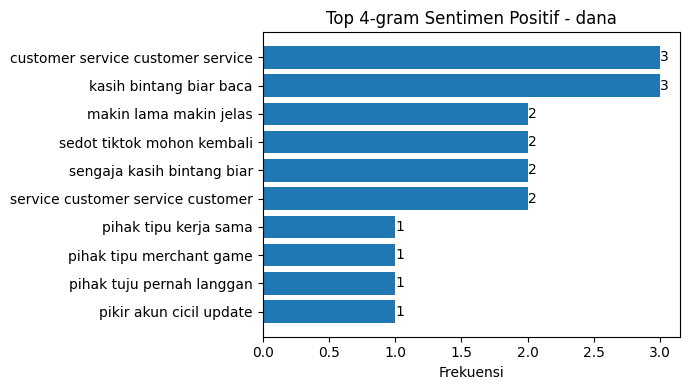

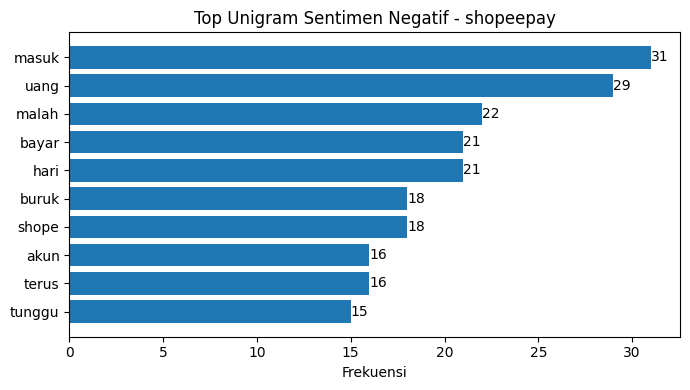

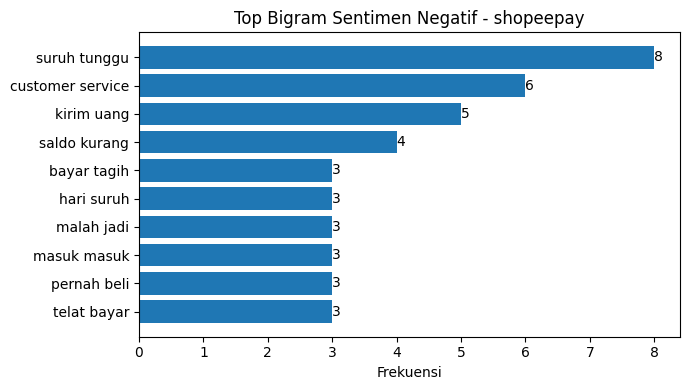

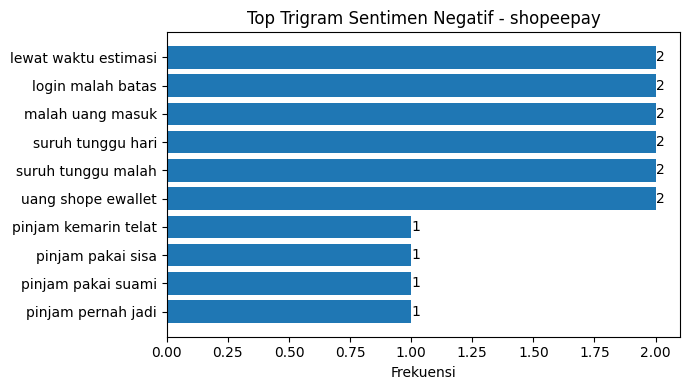

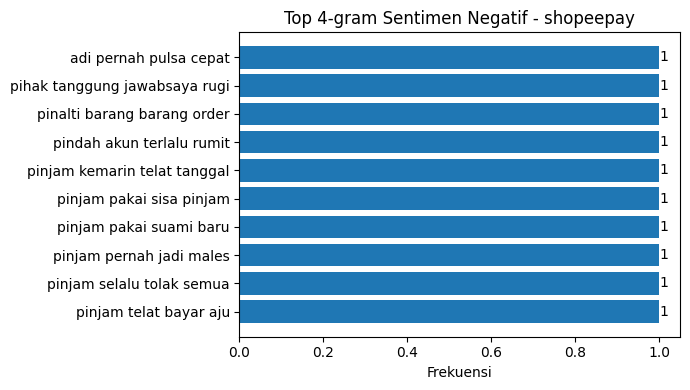

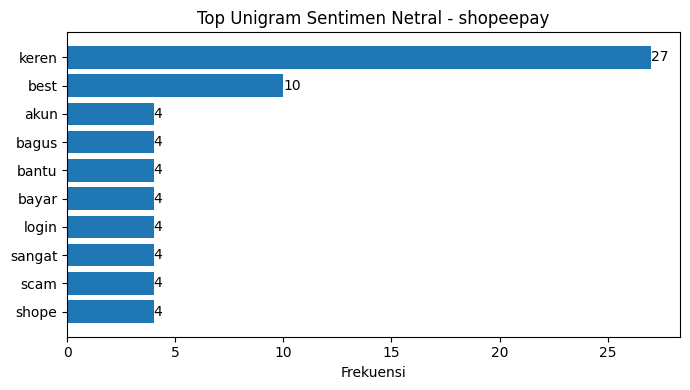

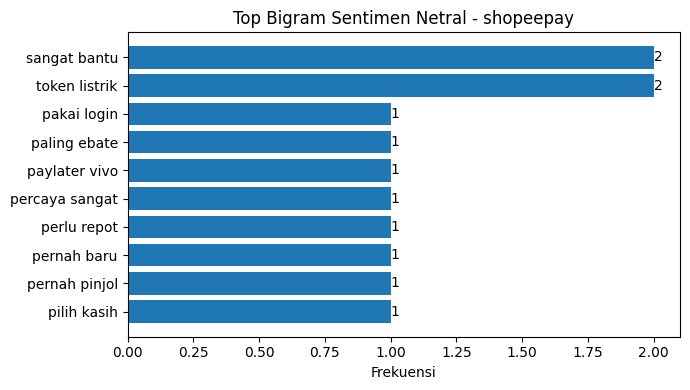

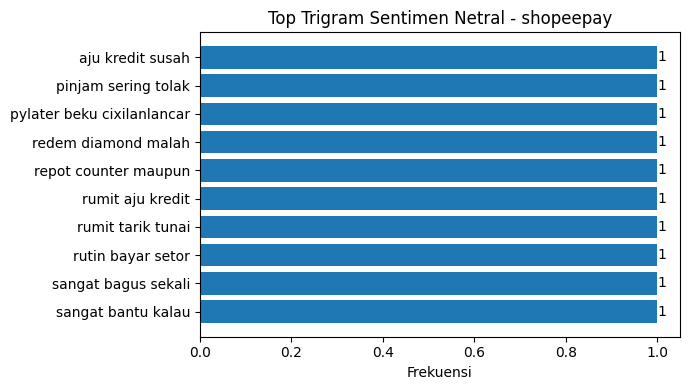

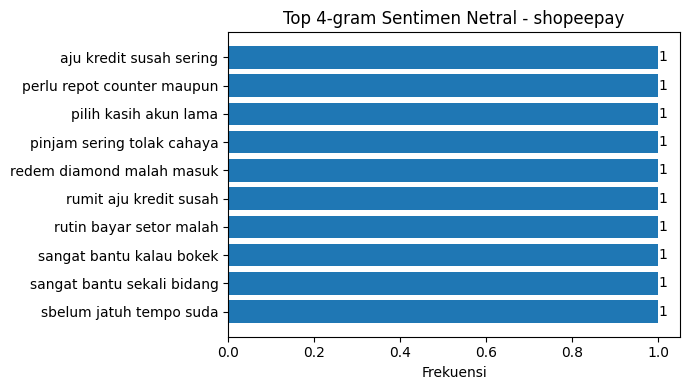

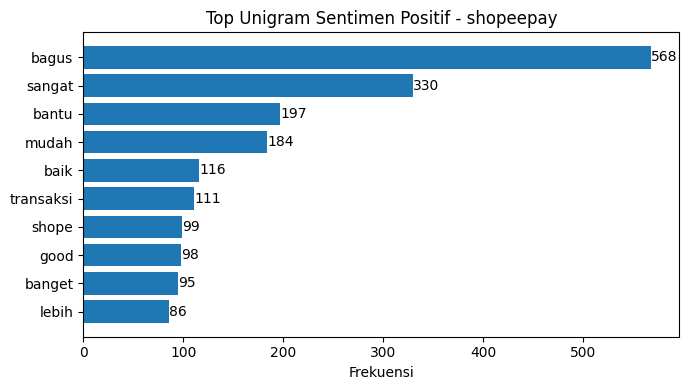

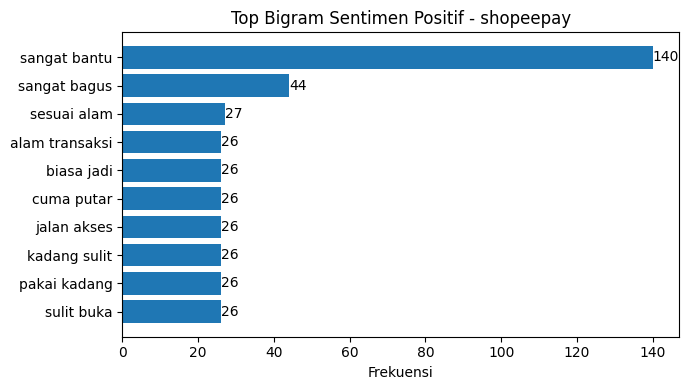

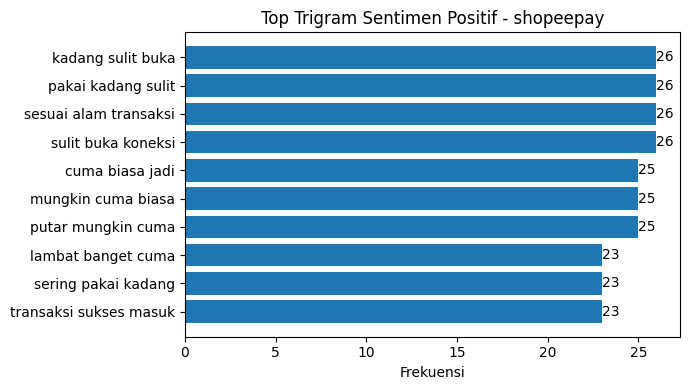

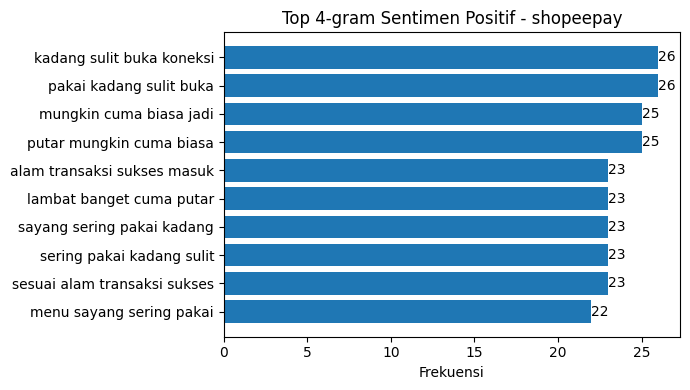

In [150]:
apps = df["app"].unique()
sentiments = ["negatif", "netral", "positif"]

for app in apps:
    for sent in sentiments:
        subset = df[
            (df["app"] == app) &
            (df["label_lexicon"] == sent)
        ]

        if subset.empty:
            continue

        texts = subset["content_clean"].dropna().tolist()

        # Unigram
        plot_ngram_bar(
            texts,
            (1,1),
            f"Top Unigram Sentimen {sent.capitalize()} - {app}"
        )

        # Bigram
        plot_ngram_bar(
            texts,
            (2,2),
            f"Top Bigram Sentimen {sent.capitalize()} - {app}"
        )

        # Trigram
        plot_ngram_bar(
            texts,
            (3,3),
            f"Top Trigram Sentimen {sent.capitalize()} - {app}"
        )

        # 4-gram
        plot_ngram_bar(
            texts,
            (4,4),
            f"Top 4-gram Sentimen {sent.capitalize()} - {app}"
        )


MODEL TF-IDF SVM

In [151]:
from sklearn.model_selection import train_test_split

# Fitur dan label
X = df_invalid["content_clean"]
y = df_invalid["label_rating"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [152]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,3)
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [153]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

c:\Users\Ninak\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [154]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = svm_model.predict(X_test_tfidf)

print("Akurasi:", accuracy_score(y_test, y_pred) * 100, "%")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

Akurasi: 76.3586956521739 %

Classification Report:

              precision    recall  f1-score   support

     negatif       0.75      0.71      0.73       129
      netral       0.29      0.22      0.25        37
     positif       0.83      0.90      0.87       202

    accuracy                           0.76       368
   macro avg       0.62      0.61      0.61       368
weighted avg       0.75      0.76      0.75       368

Confusion Matrix:

[[ 91  17  21]
 [ 14   8  15]
 [ 17   3 182]]


In [160]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2)
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [161]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

c:\Users\Ninak\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [162]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = svm_model.predict(X_test_tfidf)

print("Akurasi:", accuracy_score(y_test, y_pred) * 100, "%")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

Akurasi: 77.44565217391305 %
              precision    recall  f1-score   support

     negatif       0.76      0.73      0.75       129
      netral       0.32      0.22      0.26        37
     positif       0.83      0.91      0.87       202

    accuracy                           0.77       368
   macro avg       0.64      0.62      0.62       368
weighted avg       0.76      0.77      0.76       368

Confusion Matrix:

[[ 94  13  22]
 [ 14   8  15]
 [ 15   4 183]]


In [157]:
# Gabungkan data uji dengan informasi aplikasi
df_eval = df.loc[X_test.index].copy()
df_eval["label_prediksi"] = y_pred

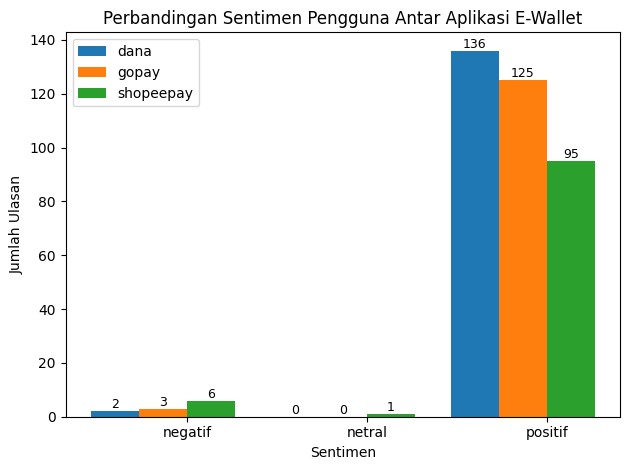

In [158]:
import numpy as np
import matplotlib.pyplot as plt

sentimen_app = (
    df_eval
    .groupby(["label_prediksi", "app"])
    .size()
    .unstack(fill_value=0)
)

apps = sentimen_app.columns.tolist()
labels = sentimen_app.index
x = np.arange(len(labels))
width = 0.8 / len(apps)

plt.figure()

for i, app in enumerate(apps):
    bars = plt.bar(
        x + (i - len(apps)/2) * width,
        sentimen_app[app],
        width,
        label=app
    )
    
    # 🔢 Tambahkan angka di atas bar
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            str(int(height)),
            ha="center",
            va="bottom",
            fontsize=9
        )

plt.xlabel("Sentimen")
plt.ylabel("Jumlah Ulasan")
plt.title("Perbandingan Sentimen Pengguna Antar Aplikasi E-Wallet")
plt.xticks(x, labels)
plt.legend()
plt.tight_layout()
plt.show()

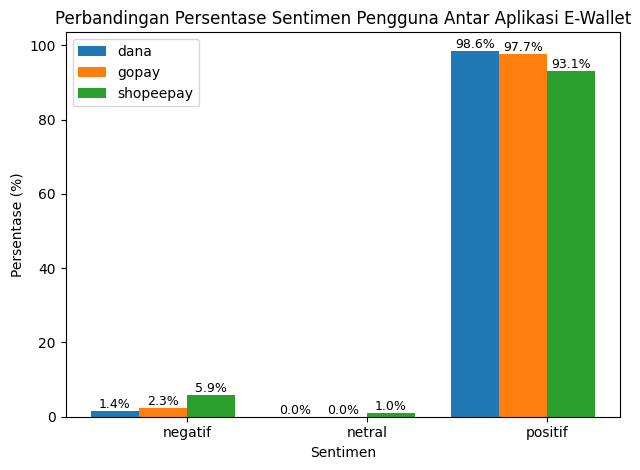

In [159]:
import numpy as np
import matplotlib.pyplot as plt

# Hitung jumlah sentimen
sentimen_app = (
    df_eval
    .groupby(["label_prediksi", "app"])
    .size()
    .unstack(fill_value=0)
)

# Ubah ke persentase per aplikasi
sentimen_persen = sentimen_app.div(sentimen_app.sum(axis=0), axis=1) * 100

apps = sentimen_persen.columns.tolist()
labels = sentimen_persen.index
x = np.arange(len(labels))
width = 0.8 / len(apps)

plt.figure()

for i, app in enumerate(apps):
    bars = plt.bar(
        x + (i - len(apps)/2) * width,
        sentimen_persen[app],
        width,
        label=app
    )
    
    # 🔢 Tambahkan persentase di atas bar
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{height:.1f}%",
            ha="center",
            va="bottom",
            fontsize=9
        )

plt.xlabel("Sentimen")
plt.ylabel("Persentase (%)")
plt.title("Perbandingan Persentase Sentimen Pengguna Antar Aplikasi E-Wallet")
plt.xticks(x, labels)
plt.legend()
plt.tight_layout()
plt.show()
